<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/iris_rbf_sgdclf_and_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.kernel_approximation import RBFSampler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [2]:
X,y=load_iris(True)

In [3]:
X=X[:,:2]

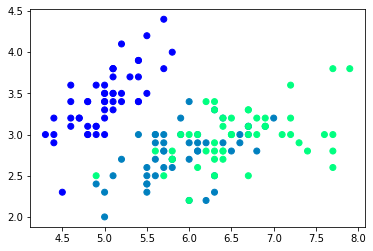

In [4]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter')

In [6]:
rbf_sampler=RBFSampler(random_state=0)
X_features=rbf_sampler.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y)

In [10]:
sgd_clf=SGDClassifier(loss='hinge')
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.score(X_test,y_test)

0.7631578947368421

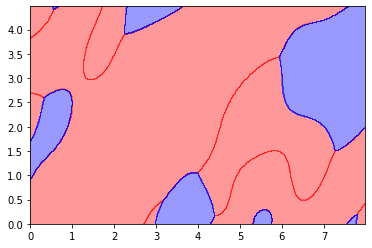

In [22]:
x1_min,x1_max,x2_min,x2_max=0.,8.,0.,4.5
resolution=0.02
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
X=(np.array([xx1.ravel(),xx2.ravel()]).T)
plot_z=sgd_clf.predict(rbf_sampler.fit_transform(X))
colors=('red','blue')
cmap=ListedColormap(colors[:len(np.unique(plot_z))])
plot_z=plot_z.reshape(xx1.shape)
plt.contourf(xx1,xx2,plot_z,alpha=0.4,cmap=cmap)